<a href="https://colab.research.google.com/github/silvat003/Churn-Modelling/blob/main/DL_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/BCT_genai/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

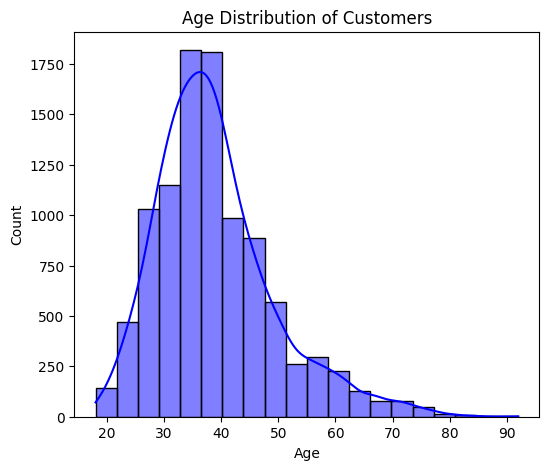

In [4]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

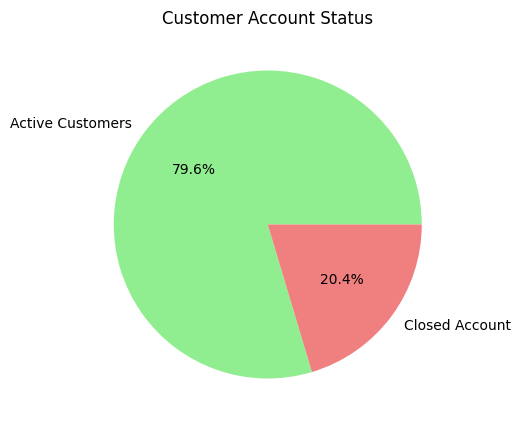

In [5]:
plt.figure(figsize=(6, 5))
df['Exited'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Active Customers', 'Closed Account'],
    colors=['lightgreen', 'lightcoral']
)
plt.title("Customer Account Status")
plt.ylabel("")
plt.show()

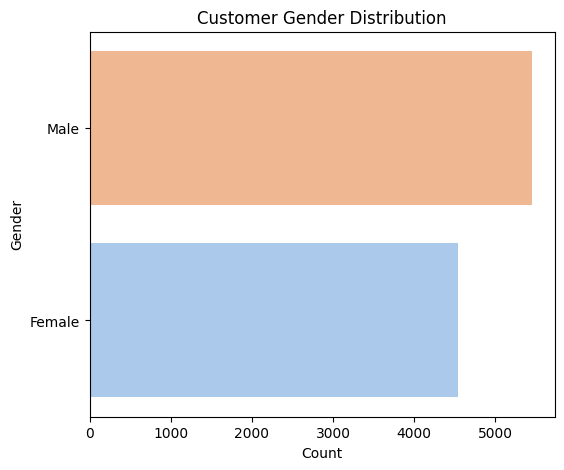

In [6]:
plt.figure(figsize=(6, 5))
sns.countplot(y=df['Gender'], hue=df['Gender'],
              order=df['Gender'].value_counts().index,
              palette="pastel", legend=False)
plt.title("Customer Gender Distribution")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

In [7]:
x=df.iloc[:,3:-1].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
y=df.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [9]:
from sklearn.preprocessing import LabelEncoder
en1=LabelEncoder()
en2=LabelEncoder()
x[:,1]=en1.fit_transform(x[:,1])
x[:,2]=en2.fit_transform(x[:,2])
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
ann_model=Sequential()
ann_model.add(Dense(units=128,activation='relu', input_dim=10))
ann_model.add(Dense(units=64,activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(units=1,activation='sigmoid'))
ann_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from keras.optimizers import Adam
opt=Adam(learning_rate=0.001)
ann_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
ann_model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7537 - loss: 0.5184 - val_accuracy: 0.8560 - val_loss: 0.3747
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8460 - loss: 0.3796 - val_accuracy: 0.8620 - val_loss: 0.3533
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8512 - loss: 0.3660 - val_accuracy: 0.8620 - val_loss: 0.3500
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8517 - loss: 0.3633 - val_accuracy: 0.8610 - val_loss: 0.3519
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8552 - loss: 0.3485 - val_accuracy: 0.8610 - val_loss: 0.3547
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8479 - loss: 0.3595 - val_accuracy: 0.8600 - val_loss: 0.3477
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.3401 - val_accuracy: 0.8595 - val_loss: 0.3482
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8624 - loss: 0.3469 - val_accuracy: 0.

In [15]:
y_pred = ann_model.predict(x_test)
print(y_pred[:100])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[3.2255337e-01]
 [8.4690548e-02]
 [2.6806112e-02]
 [1.4721317e-02]
 [2.2487180e-02]
 [9.9006569e-01]
 [3.4579325e-03]
 [2.1903478e-02]
 [5.2957870e-02]
 [9.9993497e-01]
 [9.3697181e-06]
 [3.7020954e-01]
 [1.6690585e-01]
 [3.5607734e-01]
 [9.9951237e-01]
 [2.7960253e-01]
 [4.1809508e-01]
 [2.4846302e-02]
 [1.1617119e-01]
 [7.9834405e-03]
 [6.6477114e-01]
 [2.2651728e-04]
 [1.1347865e-03]
 [3.8989026e-02]
 [1.0130695e-03]
 [3.8126011e-03]
 [2.3829167e-01]
 [1.3128851e-03]
 [3.1448999e-01]
 [1.6447377e-01]
 [7.2959303e-03]
 [3.6172435e-01]
 [2.4488694e-03]
 [2.0059280e-03]
 [3.8108099e-01]
 [2.5897054e-03]
 [5.9639486e-03]
 [2.0021893e-02]
 [2.4884549e-04]
 [6.2409803e-02]
 [1.9304243e-01]
 [5.1130289e-01]
 [9.1707809e-03]
 [1.4125136e-02]
 [4.7850448e-01]
 [1.7252162e-02]
 [1.1359984e-01]
 [1.8935072e-03]
 [1.3527089e-01]
 [6.5948316e-03]
 [9.9946404e-01]
 [3.3775590e-02]
 [9.9996766e-03]
 [3.5784841e-02]
 [1.0641614e-03]
 [4.7733393e-03]
 [5.80056

In [16]:
y_pred = (y_pred >= 0.5).astype(int).flatten()
y_pred[:100]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred, average='weighted'))
print("Recall =", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score =", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[1514   81]
 [ 208  197]]
Accuracy = 0.8555
Precision = 0.8446683524260731
Recall = 0.8555
F1 Score = 0.8448317995366167
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.49      0.58       405

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.86      0.84      2000



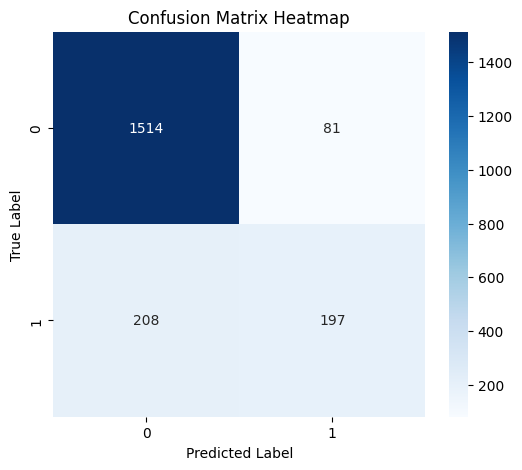

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

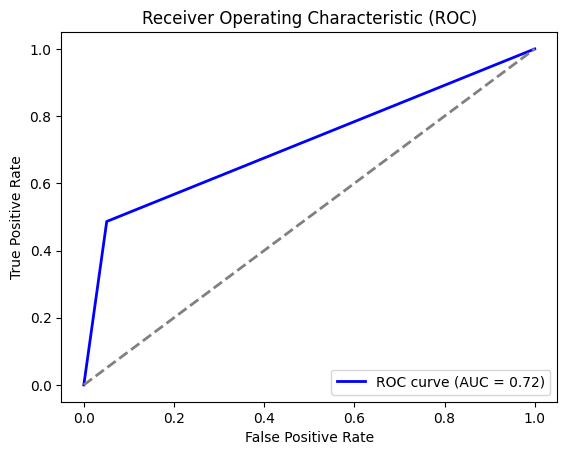

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# y_test: true binary labels (0 or 1)
# y_pred: predicted scores or probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()